# TRANSFER ENSEMBLE LEARNING MODEL

# AIDI 2000: ASSIGNMENT 2

Group Members:
- Zaina Firosh Kamal
- Preyaskumar Jayswal
- Kintu Declan Trevor

Import Libraries.

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

Load Dataset.

In [24]:
# Load data
data = pd.read_csv("movie.csv")
data.dropna(inplace=True)
print(data.describe())
print(data.head())

              label
count  40000.000000
mean       0.499525
std        0.500006
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
                                                text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1


Preprocess and split data.

In [25]:
# Prepare features and labels
X_text = data["text"]
y = data["label"]

# Split data into training and testing sets
X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.3, random_state=42)

Define and train models.

In [26]:
# Define TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Adjust max_features as needed

# Define base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create pipelines for base models
rf_pipeline = make_pipeline(tfidf_vectorizer, rf_model)
gb_pipeline = make_pipeline(tfidf_vectorizer, gb_model)

Train Base Models

In [27]:
rf_pipeline.fit(X_train_text, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(max_features=10000)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [28]:
gb_pipeline.fit(X_train_text, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(max_features=10000)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])

Make Predictions and evaluate model performance.

In [29]:
# Make predictions
rf_pred = rf_pipeline.predict(X_test_text)
gb_pred = gb_pipeline.predict(X_test_text)

# Ensemble predictions
ensemble_pred = (rf_pred + gb_pred) / 2  # Simple averaging for binary classification
ensemble_pred_binary = ensemble_pred.round()

# Calculate accuracy
accuracy = accuracy_score(y_test, ensemble_pred_binary)
print("Ensemble Model Accuracy:", accuracy)

Ensemble Model Accuracy: 0.83425


Plot graph of model performance.

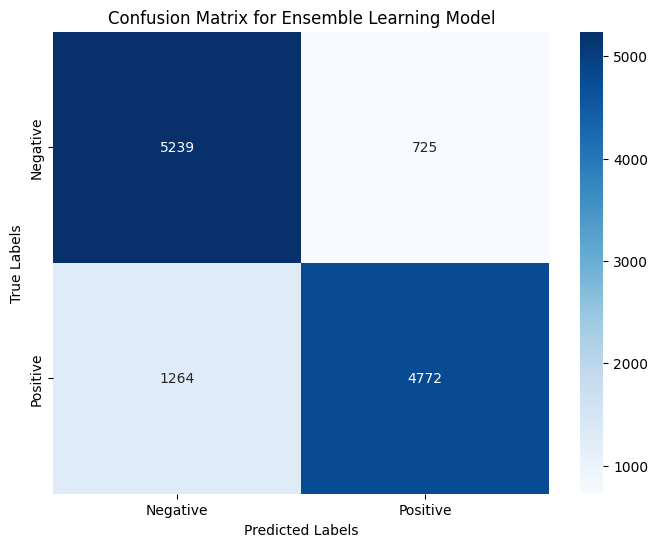

In [30]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, ensemble_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Ensemble Learning Model')
plt.show()